In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('./2023-01-27.csv')
dataset.head(10)

,分组,帐号,昵称,备注
0,primary,483028387,欧&作业只有完成时,刘博
1,primary,815927507,1000-7,李嘉雯
2,primary,942290636,沙滩的回忆,丁子俊
3,primary,1397848816,Ryan.,杨少轩
4,primary,1775789042,忘机琴声渺,董梁
5,primary,2246257278,Deeply,夏文涛
6,primary,2425794964,小羊动听,曾雅玟
7,primary,2541132903,_______struggle゛懵懂ッ,胡景柱
8,primary,2668524265,?.,葛景润
9,primary,2829197522,巴扎嘿！,许佳雨


In [3]:
name = dataset['备注']
year = dataset['分组']
ans = dataset['分组'].value_counts(sort=False)
ans = ans[['family', 'friend', 'primary', 'junior high', 'senior high', 'university']]
ans

family           5
friend          10
primary         12
junior high     38
senior high    108
university      98
Name: 分组, dtype: int64

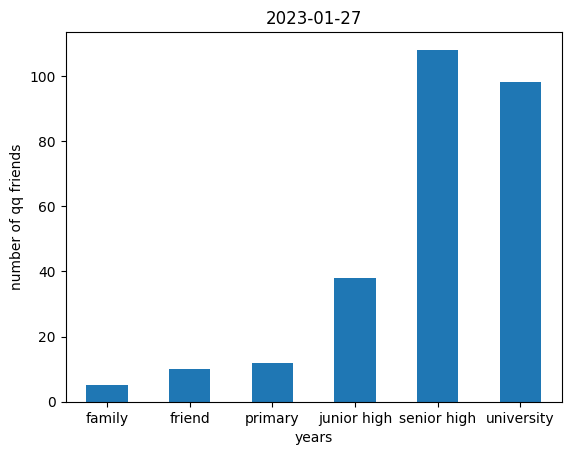

In [4]:
ans.plot(kind='bar', rot=0)
plt.title('2023-01-27')
plt.xlabel('years')
plt.ylabel('number of qq friends')
plt.show()

In [5]:
another = ans.to_frame()
another['权重'] = [1, 2, 3, 4, 5, 6] 
another

,分组,权重
family,5,1
friend,10,2
primary,12,3
junior high,38,4
senior high,108,5
university,98,6


In [6]:
X = another[['权重']]
Y = another[['分组']]
X

,权重
family,1
friend,2
primary,3
junior high,4
senior high,5
university,6


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()
poly_reg = PolynomialFeatures(degree=[1,2])
x_ploy = poly_reg.fit_transform(X)
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_ploy, Y)
model.fit(X, Y)

LinearRegression()

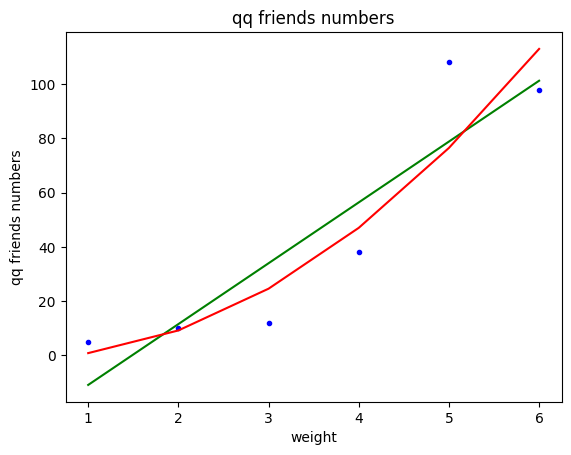

In [8]:
plt.plot(X, Y, 'b.')
plt.plot(X, model.predict(X), 'g')
plt.plot(X, lin_reg_model.predict(x_ploy), 'r')
plt.title('qq friends numbers')
plt.xlabel('weight')
plt.ylabel('qq friends numbers')
plt.show()